In [1]:


import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from scipy.stats import shapiro,normaltest,kstest

# PROBLEM STATEMENT

# DATA GATHERING

In [2]:
df=pd.DataFrame(pd.read_excel(r"C:\Users\Rutuja Salunke\Downloads\Health_Insurance_Price_Prediction-main\Health_Insurance_Price_Prediction-main\data\Health_insurance_cost (1).xlsx"))

In [3]:
df

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500


# EDA

In [4]:
# checking the null values present and Datatypes of Features.
df.isna().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

1. There are missing values in the form of NaN

2. In the dataset age , gender , BMI , Children , smoking_status , location are Independent Variables.

3. And , health_insurance_price is dependent Variable which is dependent on Independent Variables

4. As , we can see that health_insurance_price is         continous Dependent Variable , So this is Regression Problem

In [5]:
df.shape

(1338, 7)

In [6]:
df.describe()

,age,BMI,Children,health_insurance_price
count,1310.000000,1315.000000,1338.000000,1336.000000
mean,39.166412,30.638217,1.094918,13268.527719
std,14.055378,6.110302,1.205493,12112.797724
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.210000,0.000000,4744.325050
50%,39.000000,30.305000,1.000000,9382.033000
75%,51.000000,34.580000,2.000000,16604.302645
max,64.000000,53.130000,5.000000,63770.428010


1. Data is looking good as Min and Max are possible values there may be outliers but data does't contain impossible/incorrect values.
2. Gender have two unique values Male and Female
3. smoking_status also have two unique values with YES or NO.
4. In location , there are 4 locations

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


Observations
1. we have 3 features with categorical data
2. 4 features with numerical data
3. health_insurance_price is the Target Variable
4. we have 2 null values in Target Variable

# FEATURE ENGINEERING

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [9]:
df["gender"].unique()

array(['female', 'male'], dtype=object)

In [10]:
    df["gender"]=df["gender"].replace({'female':0, 'male':1})
    df

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0,NaN,0,yes,southwest,16884.92400
1,18.0,1,33.770,1,no,southeast,1725.55230
2,28.0,1,33.000,3,no,southeast,4449.46200
3,33.0,1,22.705,0,no,northwest,21984.47061
4,32.0,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,1,30.970,3,no,northwest,10600.54830
1334,18.0,0,31.920,0,no,northeast,2205.98080
1335,18.0,0,36.850,0,no,southeast,1629.83350
1336,21.0,0,25.800,0,no,southwest,2007.94500


In [11]:
df["location"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [12]:
L=LabelEncoder()
df["location"]=L.fit_transform(df["location"])
df

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0,NaN,0,yes,3,16884.92400
1,18.0,1,33.770,1,no,2,1725.55230
2,28.0,1,33.000,3,no,2,4449.46200
3,33.0,1,22.705,0,no,1,21984.47061
4,32.0,1,28.880,0,no,1,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,1,30.970,3,no,1,10600.54830
1334,18.0,0,31.920,0,no,0,2205.98080
1335,18.0,0,36.850,0,no,2,1629.83350
1336,21.0,0,25.800,0,no,3,2007.94500


In [13]:
L=LabelEncoder()
df["smoking_status"]=L.fit_transform(df["smoking_status"])
df

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0,NaN,0,1,3,16884.92400
1,18.0,1,33.770,1,0,2,1725.55230
2,28.0,1,33.000,3,0,2,4449.46200
3,33.0,1,22.705,0,0,1,21984.47061
4,32.0,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,1,30.970,3,0,1,10600.54830
1334,18.0,0,31.920,0,0,0,2205.98080
1335,18.0,0,36.850,0,0,2,1629.83350
1336,21.0,0,25.800,0,0,3,2007.94500


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   int64  
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   int32  
 5   location                1338 non-null   int32  
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int32(2), int64(2)
memory usage: 62.8 KB


In [15]:
df.isna().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

In [16]:
df["age"]=df["age"].fillna(df["age"].mean())

In [17]:
df["BMI"]=df["BMI"].fillna(df["BMI"].mean())

In [18]:
df["health_insurance_price"]=df["health_insurance_price"].fillna(df["health_insurance_price"].mean())

In [19]:
df.isna().sum()

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64

## Checking for outliers

<Axes: >

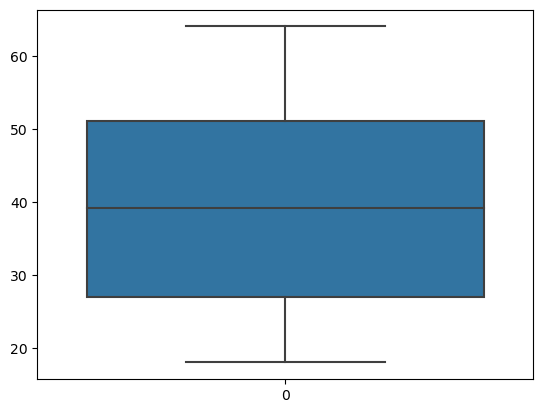

In [20]:
sns.boxplot(df["age"])

<Axes: >

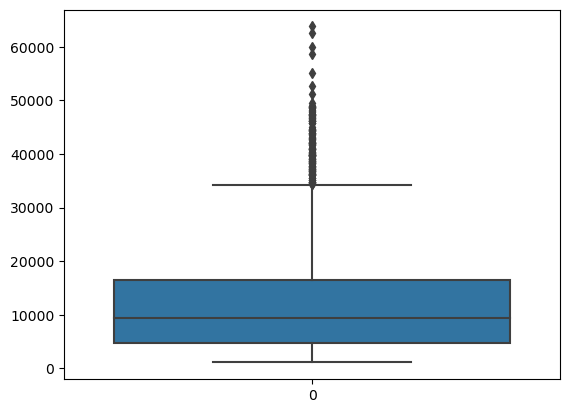

In [21]:
sns.boxplot(df["health_insurance_price"])

## Handling Outliers

In [22]:
## Handle outliers
def find_iqr(df,n):
    q1=df[n].quantile(0.25)
    q3=df[n].quantile(0.75)
    iqr=q3-q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    print(lower_tail)
    print(upper_tail)
    df[n]=df[n].apply(lambda x: upper_tail if x>upper_tail else(lower_tail if x<lower_tail else x))
n="BMI"
find_iqr(df,n)

14.142500000000004
46.6025


In [23]:
n="age"
find_iqr(df,n)

-9.0
87.0


# FEATURE SELECTION

In [24]:
df.corr()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
age,1.000000,-0.017347,0.110553,0.041067,-0.021417,0.006847,0.294497
gender,-0.017347,1.000000,0.045547,0.017163,0.076185,0.004588,0.058559
BMI,0.110553,0.045547,1.000000,0.011059,0.002819,0.153614,0.195406
Children,0.041067,0.017163,0.011059,1.000000,0.007673,0.016569,0.067468
smoking_status,-0.021417,0.076185,0.002819,0.007673,1.000000,-0.002181,0.786014
location,0.006847,0.004588,0.153614,0.016569,-0.002181,1.000000,-0.005162
health_insurance_price,0.294497,0.058559,0.195406,0.067468,0.786014,-0.005162,1.000000


## CHECKING ASSUMPTIONS

### 1. Linearity

<Axes: >

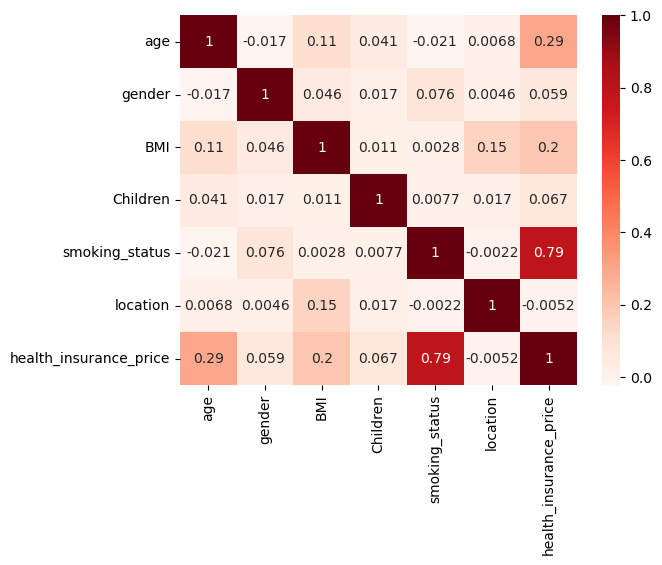

In [25]:
sns.heatmap(df.corr(),annot=True, cmap="Reds")

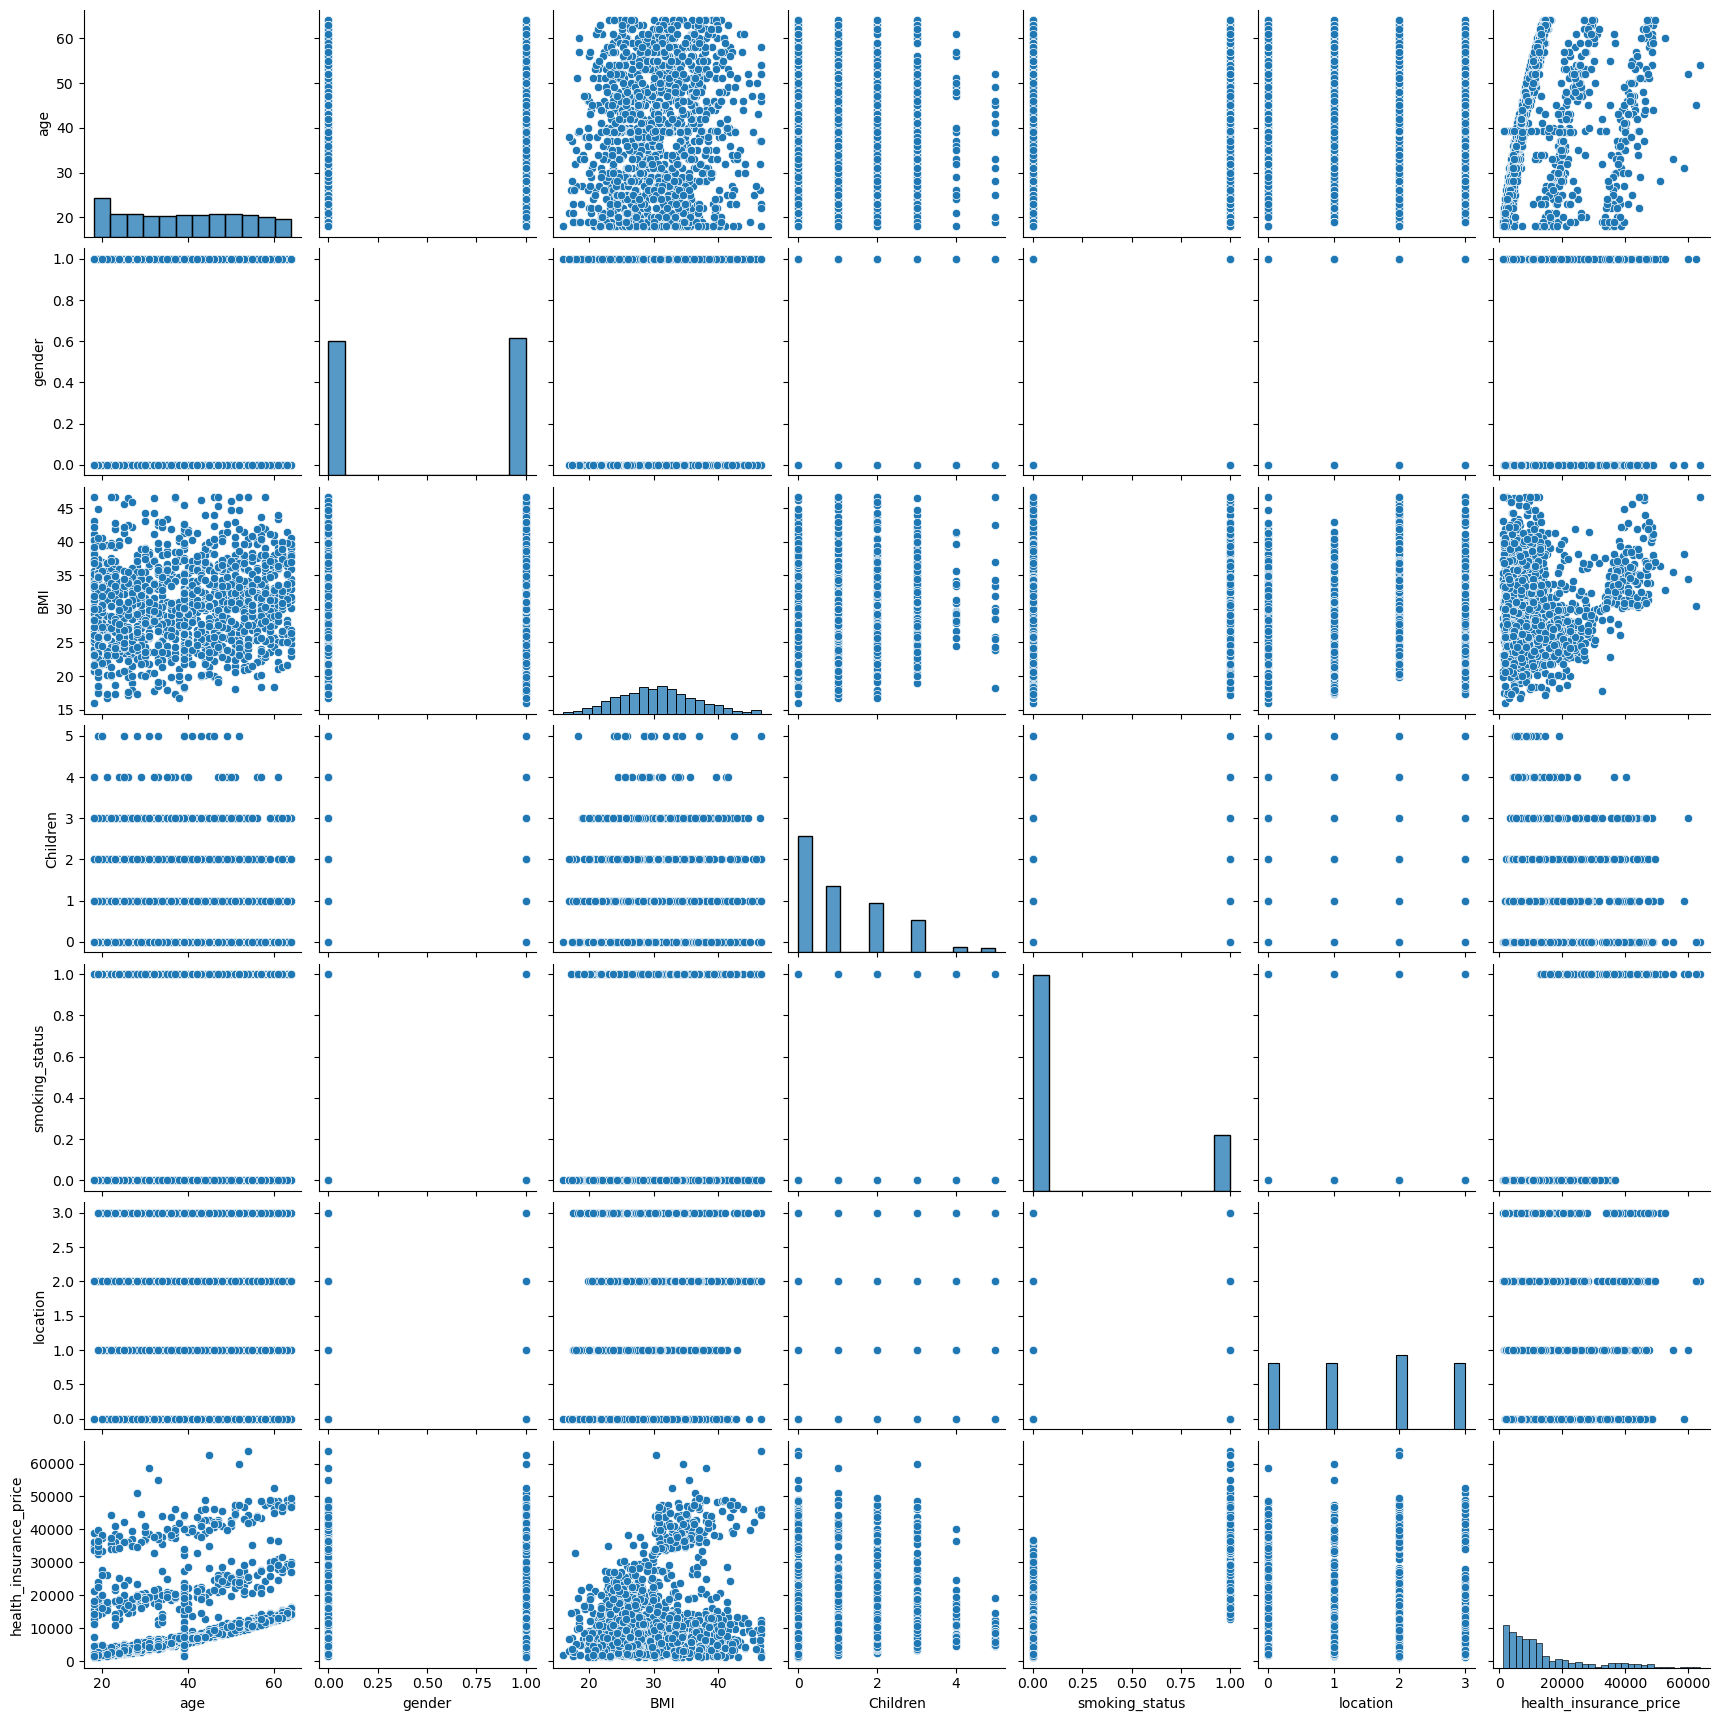

In [26]:
sns.pairplot(df)

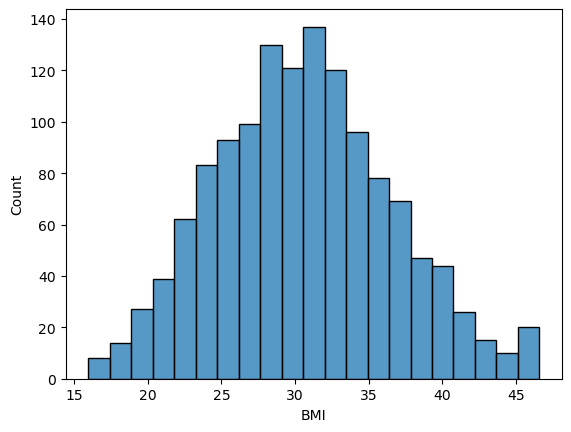

In [27]:
fig =sns.histplot(df, x="BMI")


C:\Users\Rutuja Salunke\AppData\Local\Temp\ipykernel_2480\1400876974.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['health_insurance_price'])


<Axes: xlabel='health_insurance_price', ylabel='Density'>

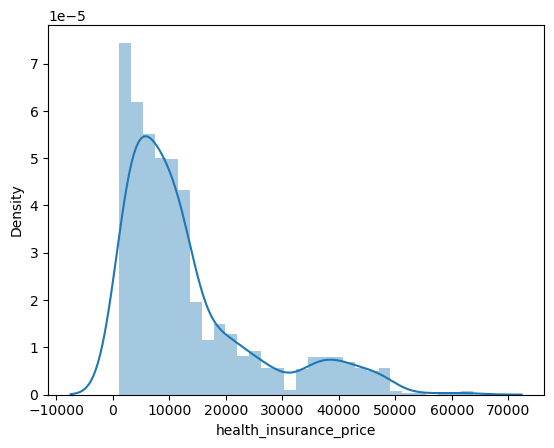

In [28]:
sns.distplot(df['health_insurance_price'])

C:\Users\Rutuja Salunke\AppData\Local\Temp\ipykernel_2480\4107119561.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BMI'])


<Axes: xlabel='BMI', ylabel='Density'>

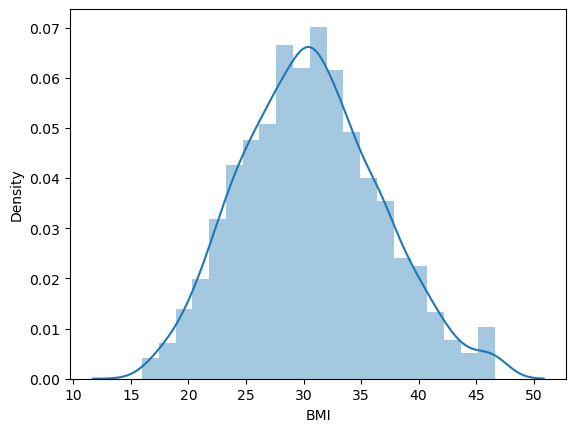

In [29]:
sns.distplot(df['BMI'])

### 2. No Multicolinearity

In [25]:
df1=df.drop("health_insurance_price",axis=1)
df1

,age,gender,BMI,Children,smoking_status,location
0,19.0,0,30.638217,0,1,3
1,18.0,1,33.770000,1,0,2
2,28.0,1,33.000000,3,0,2
3,33.0,1,22.705000,0,0,1
4,32.0,1,28.880000,0,0,1
...,...,...,...,...,...,...
1333,50.0,1,30.970000,3,0,1
1334,18.0,0,31.920000,0,0,0
1335,18.0,0,36.850000,0,0,2
1336,21.0,0,25.800000,0,0,3


In [26]:
vif_df=pd.DataFrame()
vif_df["Columns"]=df1.columns
vif_df

,Columns
0,age
1,gender
2,BMI
3,Children
4,smoking_status
5,location


In [27]:
vif_lst=[]
for i in range(df1.shape[1]):
    Vif=variance_inflation_factor(df.to_numpy(),i)
    vif_lst.append(Vif)
vif_lst

[9.313479097576728,
 2.0074325230611016,
 10.569149767546206,
 1.805646475492194,
 3.9393487789081196,
 2.9461967907524715]

In [28]:
vif_df["VIF"]=vif_lst
vif_df

,Columns,VIF
0,age,9.313479
1,gender,2.007433
2,BMI,10.569150
3,Children,1.805646
4,smoking_status,3.939349
5,location,2.946197


# MODEL TRAINING

### Train Test Split

In [29]:
x=df1
y=df["health_insurance_price"]

In [30]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)

In [31]:
lin_reg=LinearRegression()
lin_reg

LinearRegression()

In [32]:
lin_reg_model=lin_reg.fit(xtrain,ytrain)
lin_reg_model

LinearRegression()

In [33]:
ytrain_predict=lin_reg_model.predict(xtrain)
ytrain_predict

array([ 4319.81845076, 10207.43515519,  2671.50482948, ...,
        6383.97377104,  9206.12469797, 10582.90105558])

### 3. Assumption : Normality of Residual

In [34]:
residual_train=ytrain-ytrain_predict
residual_train

559    -2673.388751
273     -589.772705
471     -468.032979
22     -2184.368247
939    -1159.263485
           ...     
1180   -5606.785665
1147   -1306.537154
527     3477.051229
1149   -3226.393698
1289   -3435.428256
Name: health_insurance_price, Length: 1070, dtype: float64

#### 1. kdeplot : kernel density estimate

<Axes: xlabel='health_insurance_price', ylabel='Density'>

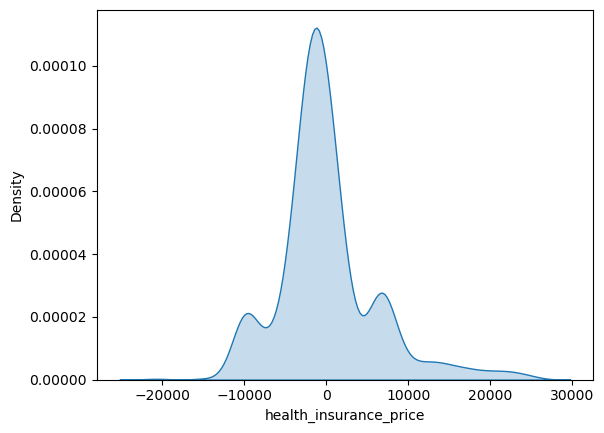

In [35]:
sns.kdeplot(residual_train, fill = True)


##### 2. Hypothesis Testing

In [36]:
p_val, stats = shapiro(residual_train)

if p_val >= 0.05:
    print(p_val)
    print(stats)
    print("Null hypothesis H0 is True")
    print("Data Is normally distributed")
    
else:
    print("Alternative Hypothesis is True")
    print("Data is not normally distributed")

0.9075590968132019
5.981566410046136e-25
Null hypothesis H0 is True
Data Is normally distributed


## Assumption 4 : Homoscadasticity

<Axes: >

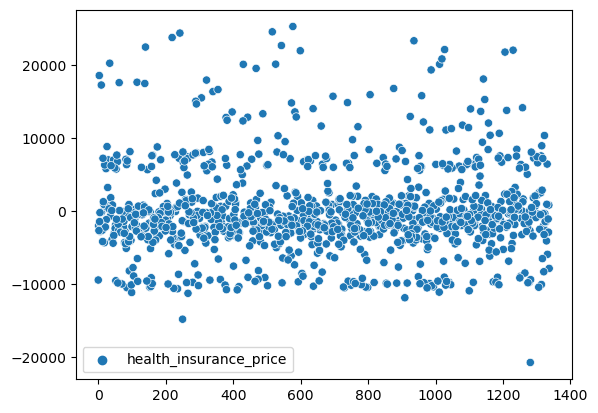

In [37]:
sns.scatterplot((ytrain,residual_train))

# Model Evaluation

In [38]:
mse = mean_squared_error(ytrain,ytrain_predict)
print("Mean squared Error = ",mse)
print()

mae = mean_absolute_error(ytrain,ytrain_predict)
print("Mean absolute Error = ",mae)
print()

rmse = np.sqrt(mse)
print("Root Mean squared Error = ",rmse)
print()

r2score = r2_score(ytrain,ytrain_predict)
print("R2 score = ",r2score)
print()

Mean squared Error =  36219012.76088929

Mean absolute Error =  4147.798424049633

Root Mean squared Error =  6018.22338908164

R2 score =  0.755117456460015



In [39]:
ytest_predict = lin_reg_model.predict(xtest)

In [40]:
mse = mean_squared_error(ytest,ytest_predict)
print("Mean squared Error = ",mse)
print()

mae = mean_absolute_error(ytest,ytest_predict)
print("Mean absolute Error = ",mae)
print()

rmse = np.sqrt(mse)
print("Root Mean squared Error = ",rmse)
print()

r2score = r2_score(ytest,ytest_predict)
print("R2 score = ",r2score)
print()

Mean squared Error =  43025779.56349037

Mean absolute Error =  4593.087507897802

Root Mean squared Error =  6559.403903060885

R2 score =  0.6932223493585651



# DECISION TREE MODEL

In [49]:
Dt=DecisionTreeRegressor()
Dt

DecisionTreeRegressor()

In [50]:
dt_model=Dt.fit(xtrain,ytrain)
dt_model

DecisionTreeRegressor()

In [51]:
ytrain_predict=dt_model.predict(xtrain)
ytrain_predict

array([1646.4297 , 9617.66245, 2203.47185, ..., 9861.025  , 5979.731  ,
       7147.4728 ])

In [52]:
mse = mean_squared_error(ytrain,ytrain_predict)
print("Mean squared Error = ",mse)
mae = mean_absolute_error(ytrain,ytrain_predict)
print("Mean absolute Error = ",mae)
rmse = np.sqrt(mse)
print("Root Mean squared Error = ",rmse)
r2score = r2_score(ytrain,ytrain_predict)
print("R2 score = ",r2score)

Mean squared Error =  0.0
Mean absolute Error =  0.0
Root Mean squared Error =  0.0
R2 score =  1.0


In [53]:
ytest_predict = dt_model.predict(xtest)

In [54]:
mse = mean_squared_error(ytest,ytest_predict)
print("Mean squared Error = ",mse)
print()

mae = mean_absolute_error(ytest,ytest_predict)
print("Mean absolute Error = ",mae)
print()

rmse = np.sqrt(mse)
print("Root Mean squared Error = ",rmse)
print()

r2score = r2_score(ytest,ytest_predict)
print("R2 score = ",r2score)
print()


Mean squared Error =  42881812.834567584

Mean absolute Error =  3165.5336523880596

Root Mean squared Error =  6548.420636654886

R2 score =  0.6942488449925208



In [55]:
hyperparameters = {
    "criterion" : ["squared_error","absolute_error"],
    "max_depth" : np.arange(1,10),
    "min_samples_split" : np.arange(2,10),
    "min_samples_leaf" : np.arange(2,10),
} 

In [48]:
grid_search_model  = GridSearchCV(dt_model,hyperparameters,cv=5)
grid_search_model

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [49]:
grid_search_model.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [50]:
grid_search_model.best_estimator_

DecisionTreeRegressor(criterion='absolute_error', max_depth=5,
                      min_samples_leaf=5)

In [51]:
hyp_dt_model = DecisionTreeRegressor(criterion='absolute_error', max_depth=5,
                      min_samples_leaf=5)

In [52]:
hyp_dt_model.fit(xtrain,ytrain)

DecisionTreeRegressor(criterion='absolute_error', max_depth=5,
                      min_samples_leaf=5)

In [53]:
yt_predict=hyp_dt_model.predict(xtrain)
yt_predict

array([1842.519  , 9283.562  , 1842.519  , ..., 6112.35295, 6112.35295,
       8023.13545])

In [54]:
mse = mean_squared_error(ytrain,yt_predict)
print("Mean squared Error = ",mse)
mae = mean_absolute_error(ytrain,yt_predict)
print("Mean absolute Error = ",mae)
rmse = np.sqrt(mse)
print("Root Mean squared Error = ",rmse)
r2score = r2_score(ytrain,yt_predict)
print("R2 score = ",r2score)

Mean squared Error =  21438632.407067087
Mean absolute Error =  1894.8726896439252
Root Mean squared Error =  4630.1870812168145
R2 score =  0.8550499742077333


In [55]:
ytest_predict1 = hyp_dt_model.predict(xtest)

In [56]:
mse = mean_squared_error(ytest,ytest_predict1)
print("Mean squared Error = ",mse)
print()

mae = mean_absolute_error(ytest,ytest_predict1)
print("Mean absolute Error = ",mae)
print()

rmse = np.sqrt(mse)
print("Root Mean squared Error = ",rmse)
print()

r2score = r2_score(ytest,ytest_predict1)
print("R2 score = ",r2score)
print()


Mean squared Error =  26583338.489971966

Mean absolute Error =  2347.4106287873133

Root Mean squared Error =  5155.903266157344

R2 score =  0.8104584225806865



# Random Forest Model

In [56]:
np.log(df1)
np.log(df)

C:\ProgramData\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,2.944439,-inf,3.422248,-inf,0.0,1.098612,9.734176
1,2.890372,0.0,3.519573,0.000000,-inf,0.693147,7.453302
2,3.332205,0.0,3.496508,1.098612,-inf,0.693147,8.400538
3,3.496508,0.0,3.122585,-inf,-inf,0.000000,9.998092
4,3.465736,0.0,3.363149,-inf,-inf,0.000000,8.260197
...,...,...,...,...,...,...,...
1333,3.912023,0.0,3.433019,1.098612,-inf,0.000000,9.268661
1334,2.890372,-inf,3.463233,-inf,-inf,-inf,7.698927
1335,2.890372,-inf,3.606856,-inf,-inf,0.693147,7.396233
1336,3.044522,-inf,3.250374,-inf,-inf,1.098612,7.604867


In [57]:
Random_model=RandomForestRegressor()
Random_model

RandomForestRegressor()

In [58]:
Random_model_reg=Random_model.fit(xtrain,ytrain)
Random_model_reg

RandomForestRegressor()

In [59]:
y_pred=Random_model_reg.predict(xtrain)
y_pred

array([ 1697.2057025 , 10040.8490952 ,  2570.00520533, ...,
        8391.4765075 ,  6985.474505  ,  7519.7874001 ])

In [60]:
mse = mean_squared_error(ytrain,y_pred)
print("Mean squared Error = ",mse)
print()

mae = mean_absolute_error(ytrain,y_pred)
print("Mean absolute Error = ",mae)
print()

rmse = np.sqrt(mse)
print("Root Mean squared Error = ",rmse)
print()

r2score = r2_score(ytrain,y_pred)
print("R2 score = ",r2score)

Mean squared Error =  3507370.999299932

Mean absolute Error =  1003.5369769462454

Root Mean squared Error =  1872.7976397090881

R2 score =  0.9762861031824033


In [61]:
y_test_predict = Random_model_reg.predict(xtest)

In [62]:
mse = mean_squared_error(ytest,y_test_predict)
print("Mean squared Error = ",mse)
print()

mae = mean_absolute_error(ytest,y_test_predict)
print("Mean absolute Error = ",mae)
print()

rmse = np.sqrt(mse)
print("Root Mean squared Error = ",rmse)
print()

r2score = r2_score(ytest,y_test_predict)
print("R2 score = ",r2score)
print()


Mean squared Error =  27474934.366972655

Mean absolute Error =  2899.3230073370123

Root Mean squared Error =  5241.653781677368

R2 score =  0.8041012643550175



In [63]:
hyperparameters = {
    "criterion" : ["squared_error","absolute_error"],
    "max_depth" : np.arange(1,20),
    "min_samples_split" : np.arange(2,30),
    "min_samples_leaf" : np.arange(2,10),
} 

In [64]:
random_search_model  = RandomizedSearchCV(Random_model_reg,hyperparameters,cv=5)
random_search_model

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [65]:
random_search_model.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [66]:
random_search_model.best_estimator_

RandomForestRegressor(max_depth=14, min_samples_leaf=5, min_samples_split=7)

In [67]:
hyp_dt_model1 = RandomForestRegressor(criterion='absolute_error', max_depth=12,
                      min_samples_leaf=6, min_samples_split=17)

In [68]:
hyp_dt_model1.fit(xtrain,ytrain)

RandomForestRegressor(criterion='absolute_error', max_depth=12,
                      min_samples_leaf=6, min_samples_split=17)

In [69]:
y_pred=hyp_dt_model1.predict(xtrain)
y_pred

array([1634.0241385 , 9323.57972575, 2187.602164  , ..., 7039.5403345 ,
       6466.590031  , 7355.10402975])

In [70]:
mse = mean_squared_error(ytrain,y_pred)
print("Mean squared Error = ",mse)
print()

mae = mean_absolute_error(ytrain,y_pred)
print("Mean absolute Error = ",mae)
print()

rmse = np.sqrt(mse)
print("Root Mean squared Error = ",rmse)
print()

r2score = r2_score(ytrain,y_pred)
print("R2 score = ",r2score)

Mean squared Error =  19888448.29163695

Mean absolute Error =  1662.5492481081676

Root Mean squared Error =  4459.646655469125

R2 score =  0.8655310171794991


In [71]:
y_test_predict = hyp_dt_model1.predict(xtest)

In [72]:
mse = mean_squared_error(ytest,y_test_predict)
print("Mean squared Error = ",mse)
print()

mae = mean_absolute_error(ytest,y_test_predict)
print("Mean absolute Error = ",mae)
print()

rmse = np.sqrt(mse)
print("Root Mean squared Error = ",rmse)
print()

r2score = r2_score(ytest,y_test_predict)
print("R2 score = ",r2score)
print()


Mean squared Error =  25390262.369948447

Mean absolute Error =  2039.3180541441568

Root Mean squared Error =  5038.875109580356

R2 score =  0.8189651618623564



In [73]:
df.columns

Index(['age', 'gender', 'BMI', 'Children', 'smoking_status', 'location',
       'health_insurance_price'],
      dtype='object')

In [74]:
df.tail(1)

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
1337,61.0,0,29.07,0,1,1,29141.3603


In [75]:
class Linear_reg():
    def Input(self):
        self.age = int(input("Enter age: "))
        self.gender = float(input("Enter gender: "))
        self.BMI = float(input("Enter BMI: "))
        self.Children = float(input("Enter no. of Childrens: "))
        self.smoking_status = float(input("Enter smoking_status: "))
        self.location = float(input("Enter location: "))
        
    def Output(self):
        df = pd.DataFrame([[self.age, self.gender, self.BMI,self.Children, self.smoking_status,self.location]], columns=['age', 'gender', 'BMI', 'Children', 'smoking_status', 'location'])
        return hyp_dt_model1.predict(df)


In [76]:
l=Linear_reg()

In [77]:
l.Input()

Enter age: 61
Enter gender: 0
Enter BMI: 29
Enter no. of Childrens: 0
Enter smoking_status: 1
Enter location: 1


In [78]:
l.Output()

array([27570.68777885])